# ENTREGABLE 5

# INSTRUCCIONES

Entrenar un perceptrón para que sea capaz de simular el comportamiento de una puerta AND.

- Generar 5000 muestras aleatorias de entrenamiento, 500 de validación y 500 de test.


*Pistas*

 * w es un vector que corresponde al valor de los pesos de cada neurona de entrada
 * b es un valor que corresponde al bias del modelo
 * El valor de la suma ponderada será el valor resultante de: *(pesos x entradas) + bias*. Para ello utilizar el producto escalar (*np.dot*)


In [ ]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size):
        # Inicializamos los pesos y el sesgo de manera aleatoria
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()

    def sigmoid(self, x):
        # Función de activación: sigmoide
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivada de la función sigmoide
        return x * (1 - x)

    def predict(self, inputs):
        # Calculamos la suma ponderada de las entradas
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        # Aplicamos la función de activación y devolvemos la predicción
        return self.sigmoid(weighted_sum)

    def train(self, X_train, Y_train, X_validation, Y_validation, learning_rate=0.1, epochs=100):

        train_error_by_epoch = []
        val_error_by_epoch = []

        for epoch in range(epochs):
            train_error_acum = 0
            for i in range(X_train.shape[0]):

                inputs = X_train[i]

                # Calcular la predicción del perceptrón
                prediction = self.predict(inputs)

                # Calcular el error
                error = Y_train[i] - prediction
                train_error_acum += error ** 2  # Aquí se acumula el cuadrado del error

                # Actualizar pesos y sesgo mediante el descenso del gradiente
                self.weights += learning_rate * error * self.sigmoid_derivative(prediction) * inputs
                self.bias += learning_rate * error

            # Calcular el error promedio por epoch
            train_error_acum /= X_train.shape[0]
            train_error_by_epoch.append(train_error_acum)

            val_error_acum = 0
            for i in range(X_validation.shape[0]):
                inputs = X_validation[i]
                prediction =  self.predict(inputs)

                error = Y_validation[i] - prediction
                val_error_acum += error ** 2

            # Calcular el error promedio de validación por epoch
            val_error_acum /= X_validation.shape[0]
            val_error_by_epoch.append(val_error_acum)

            # Visualización del progreso
            if epoch % 10 == 0:
                print('epoch:', epoch, '| train error:', train_error_acum, '| val error:', val_error_acum)

        # Visualización del error de entrenamiento por epoch
        plt.figure()
        plt.plot(range(epochs), train_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Entrenamiento por Epoch')
        plt.show()

        # Visualización del error de validación por epoch
        plt.figure()
        plt.plot(range(epochs), val_error_by_epoch, '-b')
        plt.xlabel('Epoch')
        plt.ylabel('Error cuadrático promedio')
        plt.title('Error de Validación por Epoch')
        plt.show()


In [ ]:
# Datos de entrenamiento y validación para la puerta AND
N_samples = 5000
N_inputs = 2
train_size = 0.8
N_validation = int((1 - train_size) * N_samples)

X_train = np.random.randint(0, 2, size=(N_samples, N_inputs))
Y_train = np.all(X_train, axis=1).astype(int)

X_validation = np.random.randint(0, 2, size=(N_validation, N_inputs))
Y_validation = np.all(X_validation, axis=1).astype(int)

# Visualizar algunas muestras
print("X_data (first 5 samples):")
print(X_train[:5])

print("Y_data (first 5 samples):")
print(Y_train[:5])

X_data (first 5 samples):
[[0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 0]]
Y_data (first 5 samples):
[0 0 1 0 0]


In [ ]:
# Crear y entrenar el perceptrón para la puerta AND
perceptron_and = Perceptron(input_size=N_inputs)

epoch: 0 | train error: 0.03424652263843133 | val error: 0.0071735680866604565
epoch: 10 | train error: 0.00047306935002249315 | val error: 0.00041360046528690424
epoch: 20 | train error: 0.0002264648843266793 | val error: 0.0002040874081433975
epoch: 30 | train error: 0.00014762981110619534 | val error: 0.00013447461385627661
epoch: 40 | train error: 0.00010915528118135363 | val error: 9.997610995248618e-05
epoch: 50 | train error: 8.644668004259649e-05 | val error: 7.944166599608909e-05
epoch: 60 | train error: 7.149023447844952e-05 | val error: 6.584422842806063e-05
epoch: 70 | train error: 6.0907651956164285e-05 | val error: 5.618723318455029e-05
epoch: 80 | train error: 5.303123005507241e-05 | val error: 4.8979959759891644e-05
epoch: 90 | train error: 4.694398197829634e-05 | val error: 4.339814595285543e-05


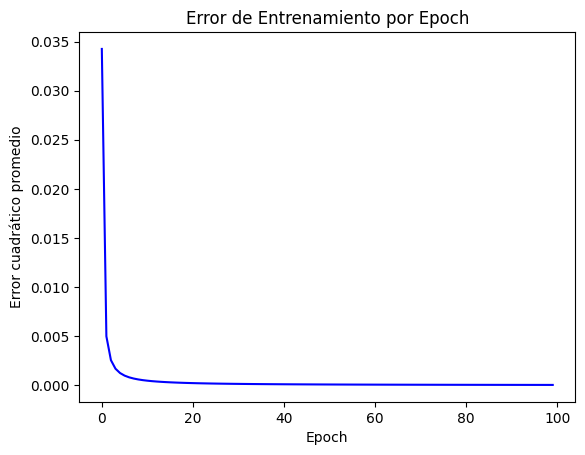

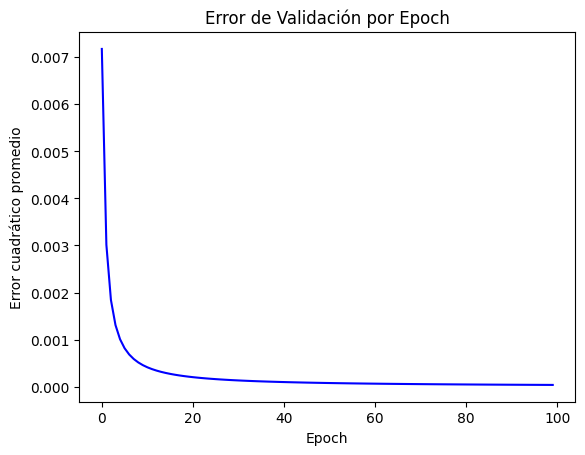

In [ ]:
# Entrenar el perceptrón
perceptron_and.train(X_train, Y_train, X_validation, Y_validation)

In [ ]:
# Generar datos de prueba para la puerta AND
N_samples_test = 500
N_inputs = 2
X_test = np.random.randint(0, 2, size=(N_samples_test, N_inputs))
Y_test = np.all(X_test, axis=1).astype(int)

# Generar las predicciones
predictions = [perceptron_and.predict(inputs) for inputs in X_test]

# Convertir las predicciones a clases binarias (0 o 1)
predictions_binary = [1 if pred >= 0.5 else 0 for pred in predictions]

# Calcular la matriz de confusión
confusion_matrix = np.zeros((2, 2), dtype=int)
for true_label, predicted_label in zip(Y_test, predictions_binary):
    confusion_matrix[true_label][predicted_label] += 1

# Visualizar la matriz de confusión
print("Matriz de Confusión:")
print(confusion_matrix)

Matriz de Confusión:
[[362   0]
 [  0 138]]
